# The Jaynes Cummings model
Consider a single optical field mode of frequency ω coupled to a single two-level atom.
ments a resonant energy exchange between the atom and the field.


First we define the atom basis using the spinbasis function and we define the raising and lowering operator

In [ ]:
using QuantumOptics

b_spin = SpinBasis(1//2)
sp = sigmap(b_spin) # raising operator
sm = sigmam(b_spin) # lowering operator

In [ ]:
Then we define the fock basis of the field and the corresponding operators

In [ ]:
b_fock = FockBasis(200)
a = destroy(b_fock)
at = create(b_fock)

We can combine the Hilbert space with the tensor product to obtain the full Hamiltonian

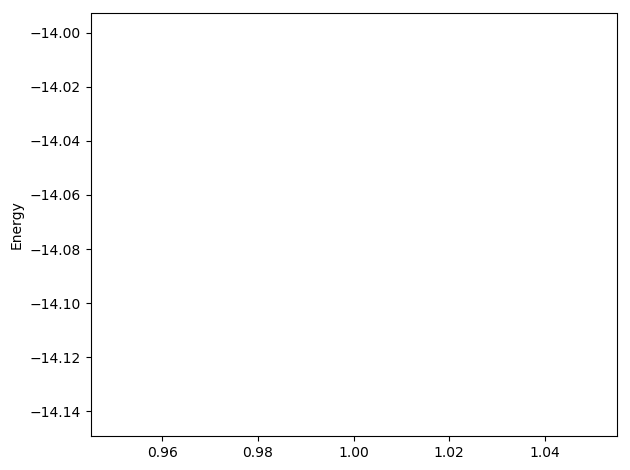

In [10]:
b_product = b_fock⊗b_spin
H = sp⊗a + sm⊗at
Ev,ϕ = eigenstates((H+dagger(H))/2,5)

using PyPlot
# using Plots => for animation


for i=1:length(ϕ)
    plot(1,Ev[i]) 
end
ylabel("Energy")
tight_layout()

Evolution of the initial state $\psi_0 = |0>\otimes |1>$

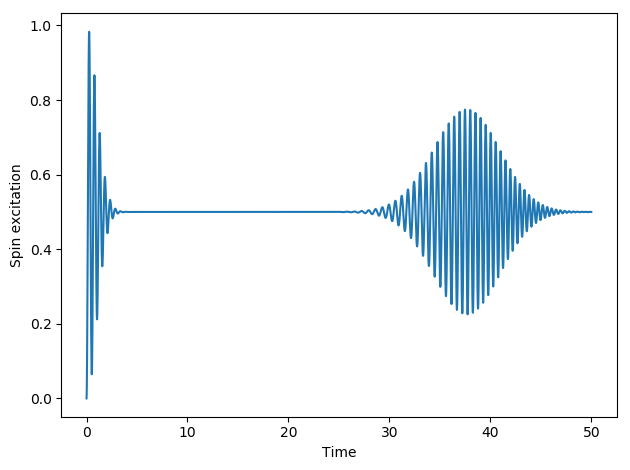

In [6]:
T = [0:0.01:50;]
ψ0 = spinup(b_spin) ⊗ coherentstate(b_fock, 6)
tout, ψt = timeevolution.schroedinger(T, ψ0, H)

using PyPlot
plot(tout, expect(1, sp*sm, ψt))
xlabel("Time")
ylabel("Spin excitation")
tight_layout()
savefig("composite.svg")